In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv("../../data/SMSSpamCollection",sep='\t',names = ['label','messages'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [70]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
df.shape

(5572, 2)

In [72]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [73]:
df['label'] = encoder.fit_transform(df['label'])

In [74]:
df.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
#missing value 
df.isnull().sum()

label       0
messages    0
dtype: int64

In [76]:
# checking dublicate values
df.duplicated().sum()

403

In [77]:
df = df.drop_duplicates(keep = 'first')

In [78]:
df.duplicated().sum()

0

In [79]:
#EDA

In [80]:
df.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [81]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

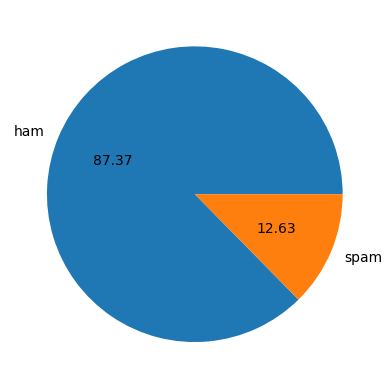

In [82]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [83]:
#data is imbalanced

In [84]:
import nltk

In [85]:
#char of every messages
df['num_characters']=df['messages'].apply(len)

In [86]:
df.head()

,label,messages,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [87]:
#num of words
df['num_words'] = df['messages'].apply(lambda x:len(nltk.word_tokenize(x)))

In [88]:
df.head()

,label,messages,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [89]:
df['num_sent'] = df['messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [90]:
df.head()

,label,messages,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [91]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [92]:
#ham
df[df['label']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [93]:
#spam
df[df['label']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [94]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

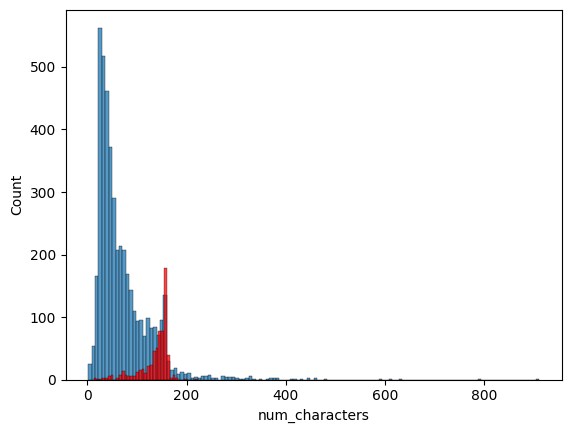

In [95]:
sns.histplot(df[df['label'] ==0]['num_characters'])
sns.histplot(df[df['label'] ==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

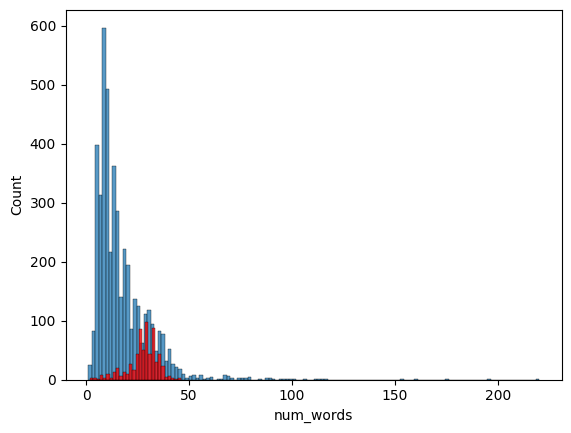

In [96]:
sns.histplot(df[df['label'] ==0]['num_words'])
sns.histplot(df[df['label'] ==1]['num_words'],color='red')

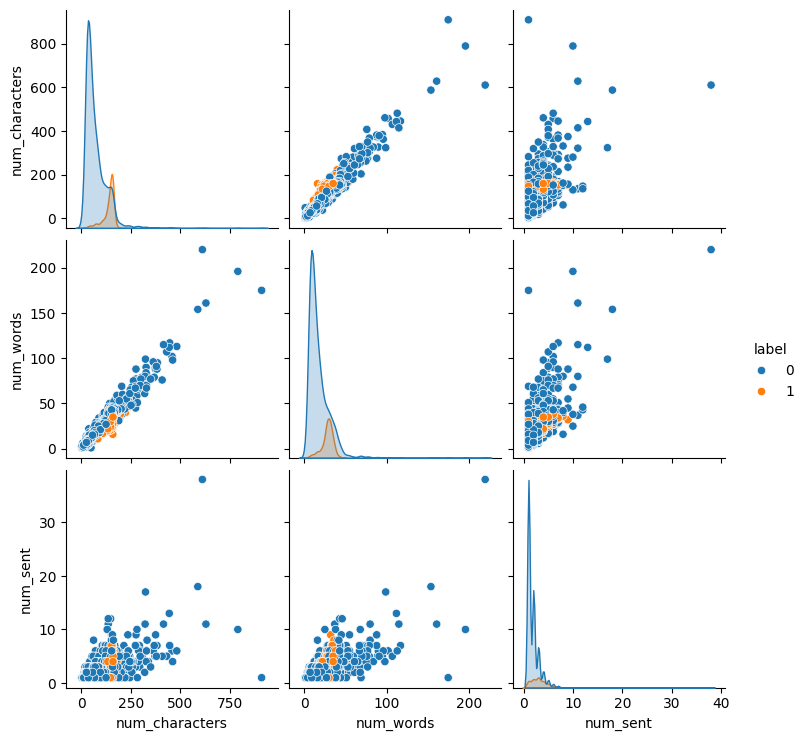

In [97]:
sns.pairplot(df,hue='label')

In [98]:
# sns.heatmap(df.corr())

In [99]:
##dataCleaning
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
wt = WordNetLemmatizer()

In [100]:
def transform_text(text):
    corpus = []
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    
    text = [wt.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    # corpus.append(text)
    return text

In [101]:
df['tansform_text'] = df['messages'].apply(transform_text)

In [102]:
df.head()

,label,messages,num_characters,num_words,num_sent,tansform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [103]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height = 500,min_font_size=10,background_color='white')

In [104]:
span_wc = wc.generate(df[df['label']==1]['tansform_text'].str.cat(sep=" "))

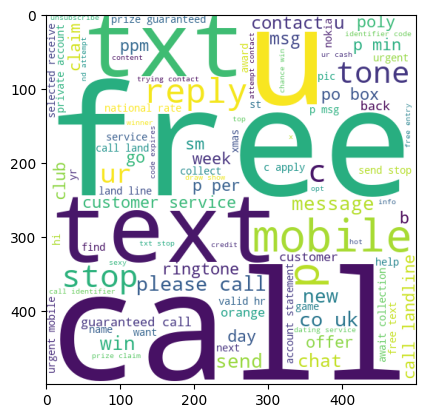

In [105]:
plt.imshow(span_wc)

In [106]:
ham_wc = wc.generate(df[df['label']==0]['tansform_text'].str.cat(sep=' '))

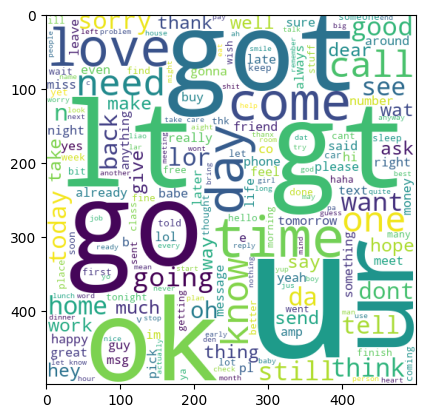

In [107]:
plt.imshow(ham_wc)

In [108]:
df.head()

,label,messages,num_characters,num_words,num_sent,tansform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [109]:
spam_corpus = []
for msg in df[df['label']==1]['tansform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [110]:
len(spam_corpus)

10090

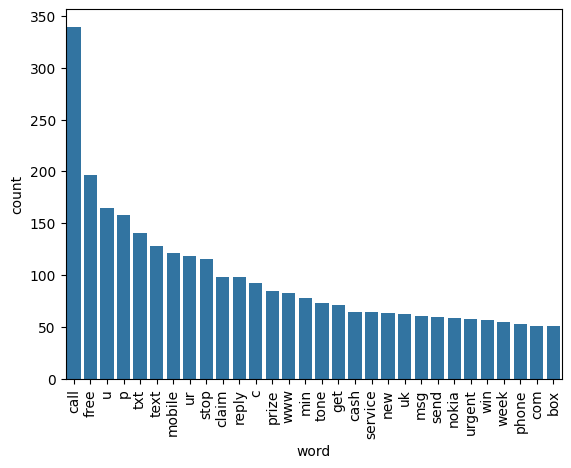

In [111]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
word_counts_df = pd.DataFrame(word_counts, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

In [112]:
ham_corpus = []
for msg in df[df['label']==0]['tansform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [113]:
len(ham_corpus)

35718

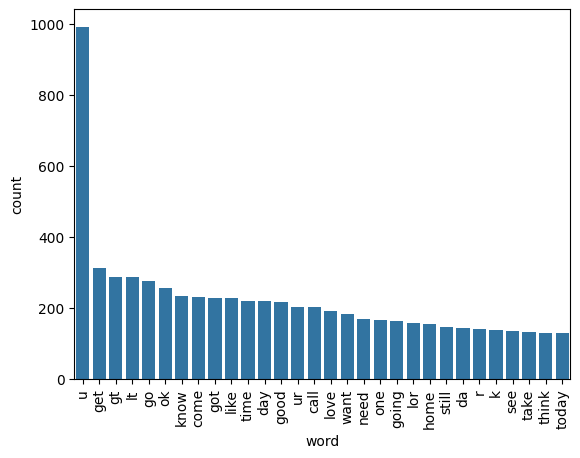

In [114]:
word_counts = Counter(ham_corpus).most_common(30)
word_counts_df = pd.DataFrame(word_counts, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

In [115]:
df.head()

,label,messages,num_characters,num_words,num_sent,tansform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [116]:
#feature Enginering

In [117]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [118]:
X = tfidf.fit_transform(df['tansform_text']).toarray()

In [119]:
X.shape

(5169, 3000)

In [120]:
y = df['label'].values

In [121]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [122]:
#model build using naive baise 

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [124]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [125]:
span_dectection_model = mnb.fit(x_train,y_train)
y_pred = span_dectection_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9787234042553191
[[896   1]
 [ 21 116]]
0.9914529914529915


In [126]:
import pickle as pk
pk.dump(tfidf,open('../models/vectorizer.pkl', 'wb'))
pk.dump(mnb,open('../models/model.pkl','wb'))